In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.externals import joblib

# Import Data & explore

In [3]:
Path = 'D:\\PROJETS\\ML_OVERTOPPING_v2\\DataBase\\'
File = 'Database_20050101v2.xls'
df_Data = pd.read_excel(Path+File)

In [4]:
df_Data.head()

,Name,Hm0 deep,Tp deep,Tm deep,"Tm-1,0 deep",h deep,m,b,h,Hm0 toe,...,tanaB,Bh,Ac,Gc,RF,CF,q,Pow,Remark,Reference
0,001-001,0.107500,1.591304,1.326087,1.446640,0.184375,42.857143,0.0,0.033125,0.024,...,0.0,0.0,0.060625,0.431875,4,3,0.000111,NaN,NaN,NaN
1,001-002,0.107500,1.591304,1.326087,1.446640,0.193125,25.000000,0.0,-0.020625,NaN,...,0.0,0.0,0.051875,0.431875,4,3,0.000144,NaN,NaN,NaN
2,001-003,0.126250,2.086957,1.739130,1.897233,0.211250,42.857143,0.0,0.060000,0.045,...,0.0,0.0,0.033750,0.431875,4,3,0.000594,NaN,NaN,NaN
3,001-004,0.126250,2.086957,1.739130,1.897233,0.211250,25.000000,0.0,-0.002500,NaN,...,0.0,0.0,0.033750,0.431875,4,3,0.000625,NaN,NaN,NaN
4,001-005,0.138125,2.165217,1.804348,1.968379,0.236250,42.857143,0.0,0.085000,0.063,...,0.0,0.0,0.008750,0.431875,3,3,0.002063,NaN,NaN,NaN


In [5]:
df_Data.drop(df_Data.index[df_Data['RF'] == 4], inplace=True)
df_Data.drop(df_Data.index[df_Data['CF'] == 4], inplace=True)

In [6]:
delete_list = ['Name',
               'Hm0 deep',
               'Tp deep',
               'Tm deep',
               'Tm-1,0 deep',
               'h deep',
               'Tm toe',
               'Tm-1,0 toe',
               'cotau',
               'cotaexcl',
               'tanaB',
               'RF',
               'CF',
               'Pow',
               'Remark',
               'Reference']

for x in delete_list:
    df_Data = df_Data.drop([x],axis=1)

df_Data = df_Data.astype('float')
df_Data = df_Data.dropna()

In [7]:
df_Data.head()

,m,b,h,Hm0 toe,Tp toe,ht,Bt,gf,cotad,cotaincl,Rc,B,hb,Bh,Ac,Gc,q
4,42.857143,0.0,0.085000,0.063000,2.165217,0.085000,0.000000,1.00,0.000000,0.000000,0.025000,0.0,0.0,0.0,0.008750,0.431875,0.002063
10,42.857143,0.0,0.085000,0.063000,2.165217,0.085000,0.000000,1.00,0.000000,0.000000,0.100000,0.0,0.0,0.0,0.031250,0.431875,0.000188
16,42.857143,0.0,0.085000,0.063000,2.165217,0.085000,0.000000,1.00,0.000000,0.000000,0.025000,0.0,0.0,0.0,0.083750,0.431875,0.000406
24,66.000000,0.0,0.326154,0.081231,1.958509,0.218462,0.184615,0.55,1.333333,1.333333,0.273846,0.0,0.0,0.0,0.215385,0.076923,0.000000
25,66.000000,0.0,0.326154,0.152308,1.665648,0.218462,0.184615,0.55,1.333333,1.333333,0.273846,0.0,0.0,0.0,0.215385,0.076923,0.000203


In [8]:
df_Data.describe()

,m,b,h,Hm0 toe,Tp toe,ht,Bt,gf,cotad,cotaincl,Rc,B,hb,Bh,Ac,Gc,q
count,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000,9369.000000
mean,455.601715,3.529920,0.499015,0.154743,1.959275,0.441387,0.115649,0.696132,1.937300,2.152865,0.244363,0.081605,0.011596,0.074468,0.226060,0.155394,0.000673
std,465.269529,11.236635,0.648454,0.263315,1.334356,0.608005,0.512220,0.274159,1.445688,1.710605,0.549223,0.295492,0.095849,0.271458,0.497263,0.480349,0.005726
min,6.000000,0.000000,0.029000,0.002618,0.727400,0.025255,0.000000,0.330000,0.000000,-1.532567,0.000000,0.000000,-0.208333,0.000000,0.000000,0.000000,0.000000
25%,40.192766,0.000000,0.204386,0.084765,1.375797,0.164508,0.000000,0.400000,1.300000,1.334259,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000002
50%,100.000000,0.000000,0.400000,0.113900,1.684000,0.300000,0.000000,0.700000,2.000000,2.000000,0.150000,0.000000,0.000000,0.000000,0.133200,0.052251,0.000027
75%,1000.000000,0.000000,0.610000,0.142113,2.124718,0.515000,0.130000,1.000000,2.700000,2.794118,0.210526,0.000000,0.000000,0.000000,0.200000,0.180000,0.000194
max,1000.000000,80.000000,9.320000,3.765000,16.400000,7.780000,10.000000,1.000000,7.000000,12.820513,8.345000,8.000000,1.175000,8.000000,7.870000,5.000000,0.165313


In [9]:
corr_matrix = df_Data.corr()

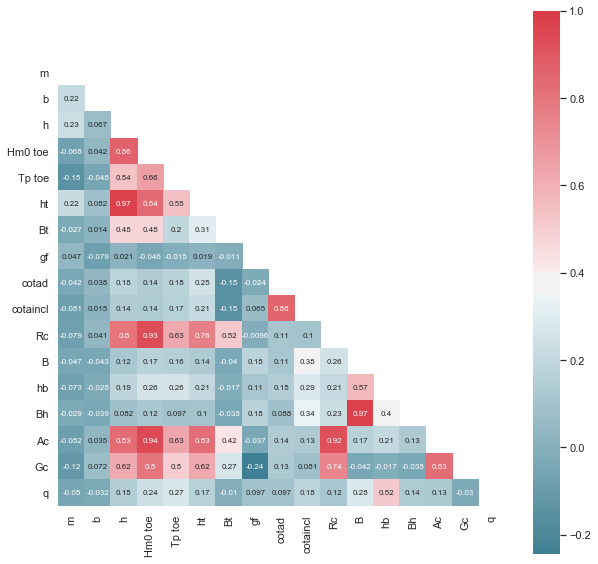

In [39]:
f, ax = plt.subplots(figsize=(10,10))
sns.set(style="white")
g = sns.heatmap(corr_matrix, mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool)),
                cmap = sns.diverging_palette(220, 10, as_cmap=True),
                square = True, annot= True, annot_kws={"size":8}, ax=ax)

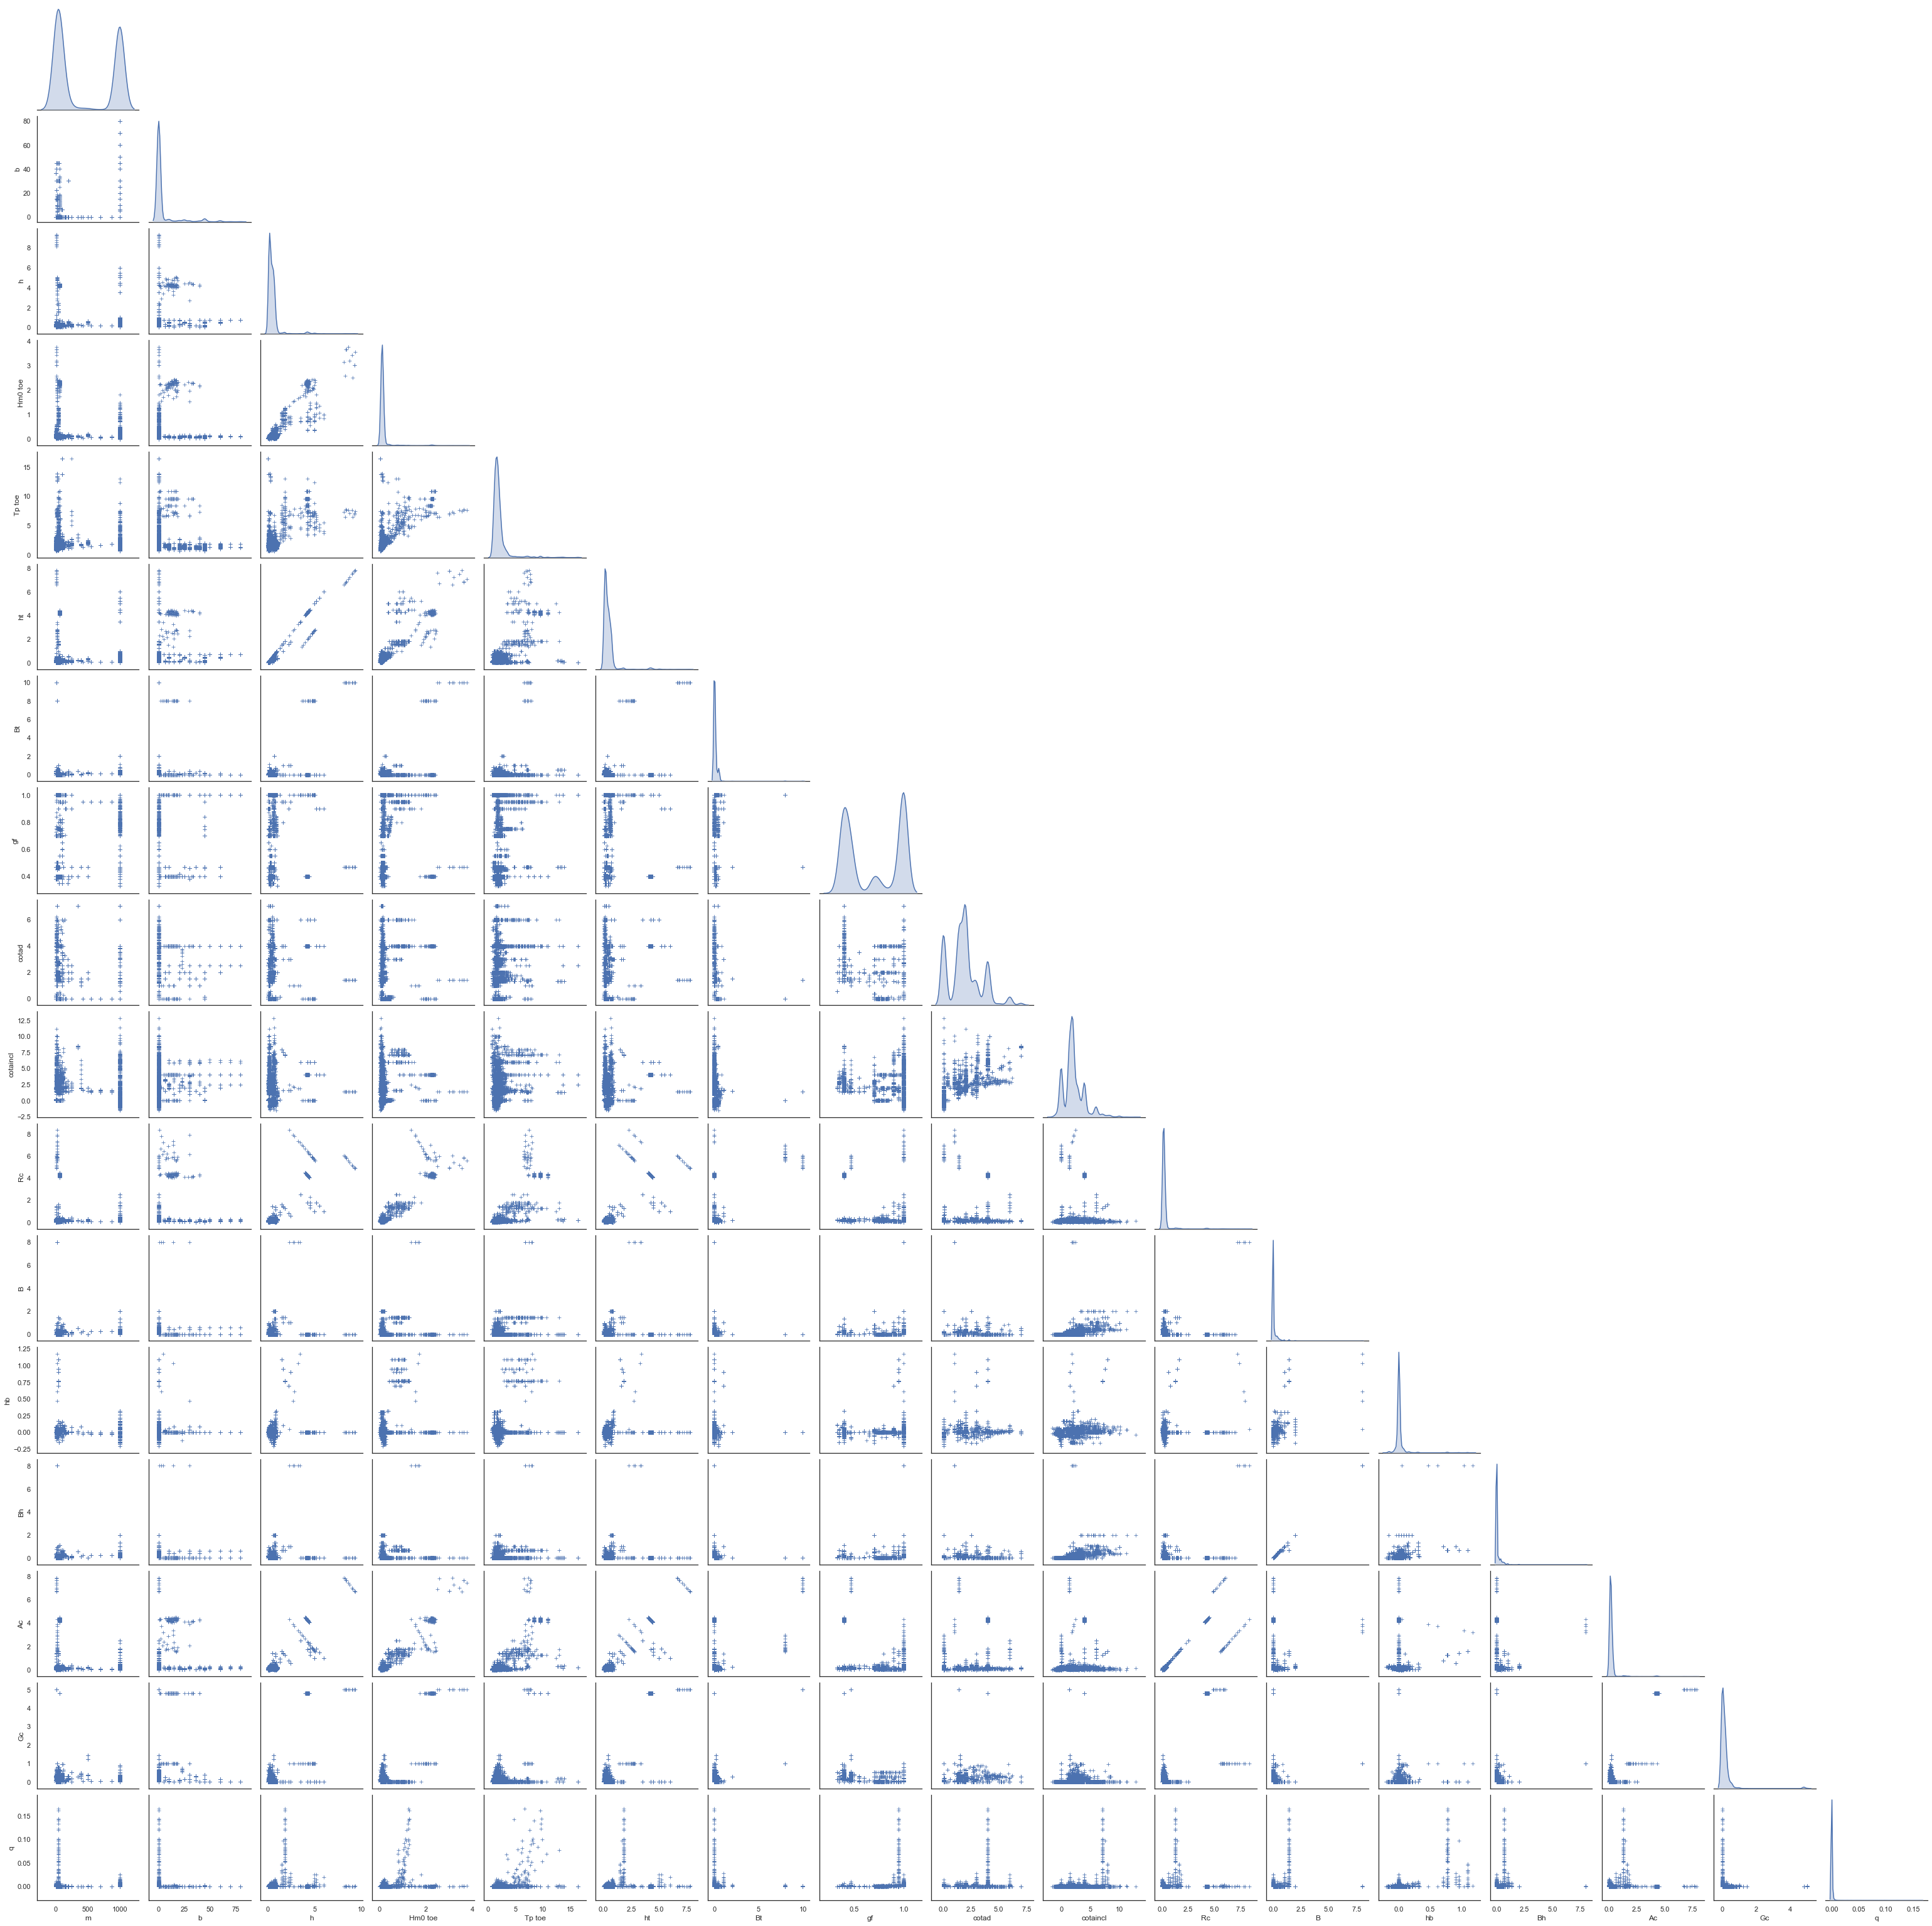

In [34]:
sns.pairplot(df_Data,
            corner=True,
            diag_kind="kde",
            markers="+")

  # Gradient Boosting Regressor vs SVR 
    

In [9]:
GBR_model = joblib.load('./models/model_GBR.pkl')
SVR_model = joblib.load('./models/model_SVR_reg.pkl')

In [11]:
GBR_model['estimator'].fit(GBR_model['train_scaled'], GBR_model['target'])
target_prediction_GBR = GBR_model['estimator'].predict(GBR_model['test_scaled'])

print("############## SCORE DATASET TEST FOR GRADIENT BOOSTING REGRESSOR ########")
print()
print("R2 TEST")
print(r2_score(GBR_model['target_test'], target_prediction_GBR))
print()
print("RMSE TEST")
print(np.sqrt(mean_squared_error(GBR_model['target_test'], target_prediction_GBR)))

############## SCORE DATASET TEST FOR GRADIENT BOOSTING REGRESSOR ########

R2 TEST
0.922014094236769

RMSE TEST
0.0019473608978454395


In [12]:
SVR_model['estimator'].fit(SVR_model['train_scaled'], SVR_model['target'])
target_prediction_SVR = SVR_model['estimator'].predict(SVR_model['test_scaled'])

print("############## SCORE DATASET TEST FOR SUPPORT VECTOR REGRESSION ########")
print()
print("R2 TEST")
print(r2_score(SVR_model['target_test'], target_prediction_SVR))
print()
print("RMSE TEST")
print(np.sqrt(mean_squared_error(SVR_model['target_test'], target_prediction_SVR))) 


############## SCORE DATASET TEST FOR SUPPORT VECTOR REGRESSION ########

R2 TEST
0.9580147550672939

RMSE TEST
0.0014288503007445243


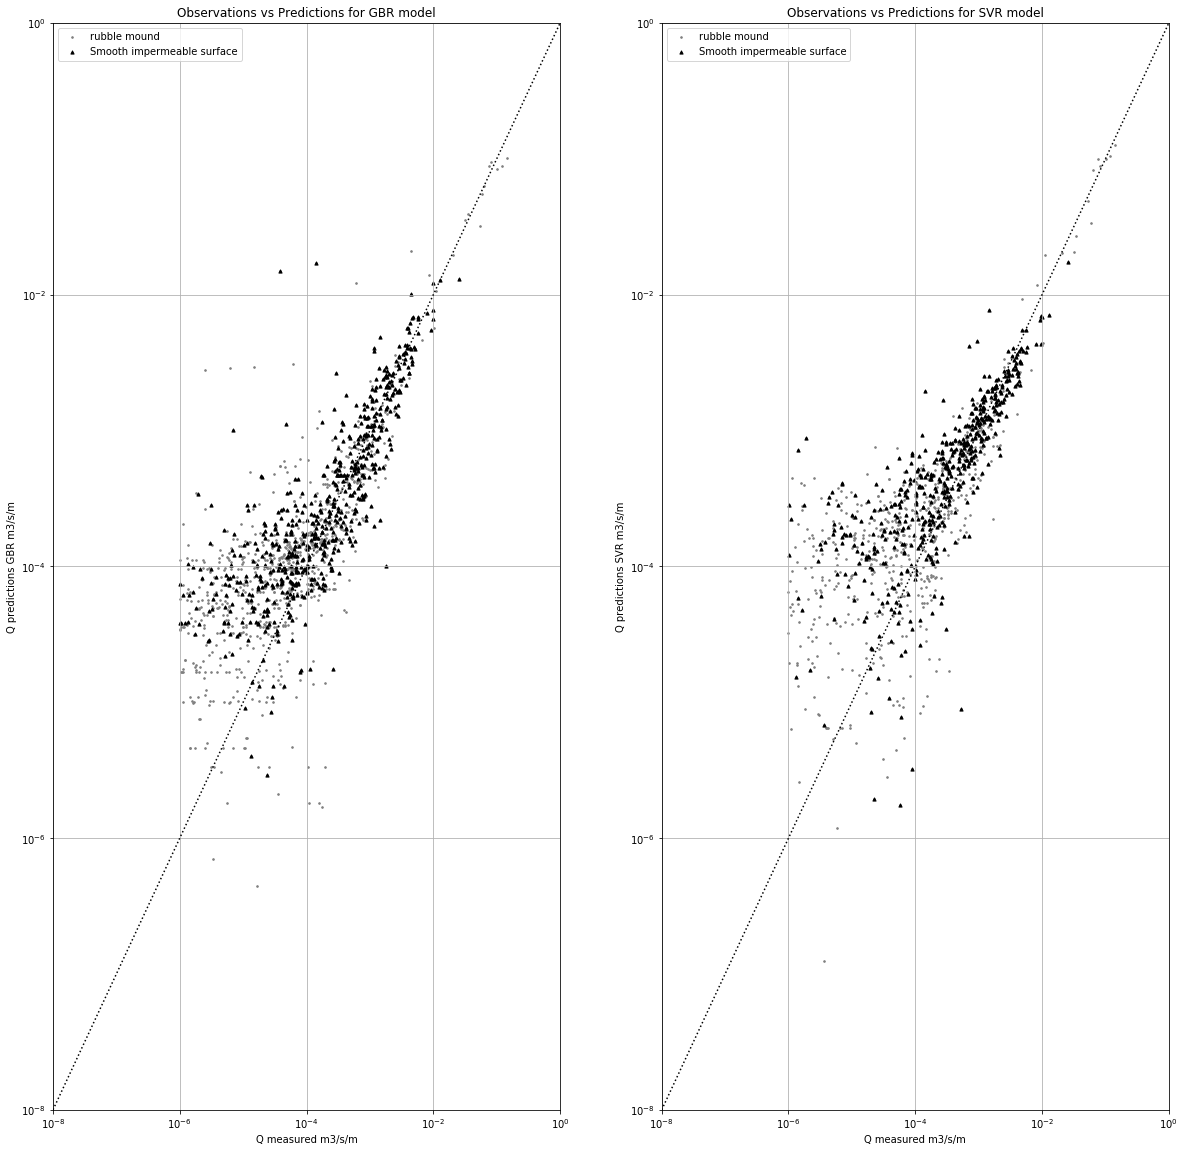

In [23]:
mask = GBR_model['features_test']['gf'] == 1

fig = plt.subplots(figsize=(20,20))
plt.subplot(121)
plt.title('Observations vs Predictions for GBR model')
plt.xlabel("Q measured m3/s/m"), plt.ylabel("Q predictions GBR m3/s/m")
plt.scatter(GBR_model['target_test'], target_prediction_GBR,s =10,marker = '.',c='gray',
           label ='rubble mound')
plt.scatter(GBR_model['target_test'][mask], target_prediction_GBR[mask],s =10,marker = '^',c='k',
           label = 'Smooth impermeable surface')
plt.plot(np.linspace(0, 1),
         np.linspace(0, 1), ':k')
plt.axis([0.00000001, 1, 0.00000001, 1])
plt.loglog()
plt.grid()
plt.legend()

plt.subplot(122)
plt.title('Observations vs Predictions for SVR model')
plt.xlabel("Q measured m3/s/m"), plt.ylabel("Q predictions SVR m3/s/m")
plt.scatter(SVR_model['target_test'], target_prediction_SVR,s = 10,marker = '.',c='gray',
           label='rubble mound')
plt.scatter(SVR_model['target_test'][mask], target_prediction_SVR[mask],s =10,marker = '^',c='k',
           label = 'Smooth impermeable surface')
plt.plot(np.linspace(0, 1),
         np.linspace(0, 1), ':k')
plt.axis([0.00000001, 1, 0.00000001, 1])
plt.loglog()
plt.grid()
plt.legend()

(Text(0.5, 0, 'Q measured - Q predictions'), Text(0, 0.5, 'Frequency'))

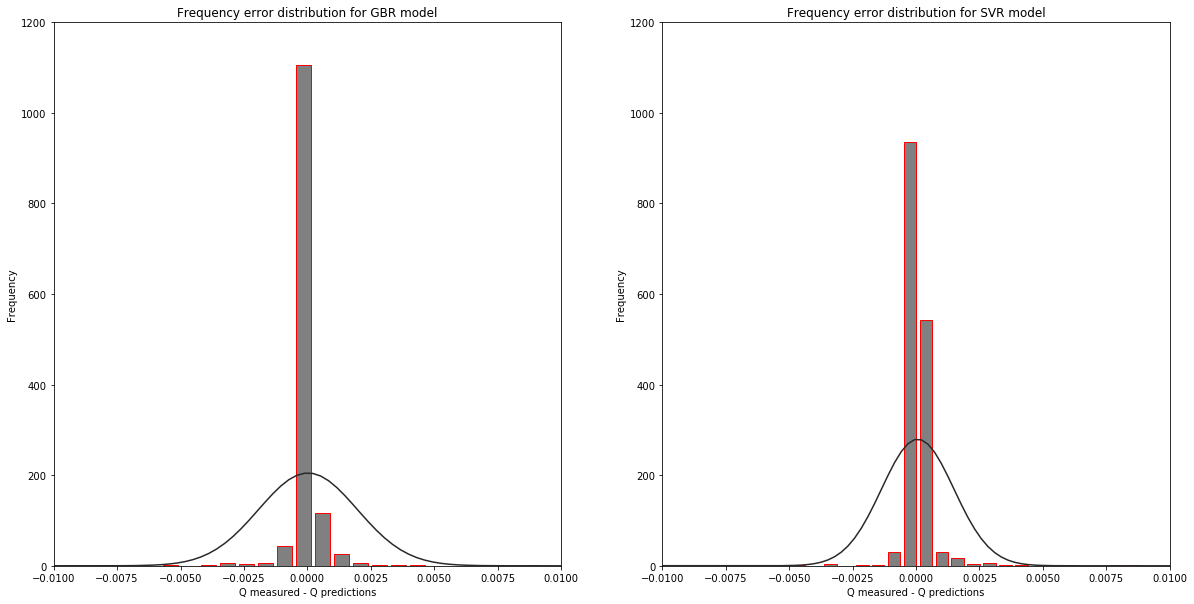

In [85]:
error_GBR = GBR_model['target_test'] - target_prediction_GBR
error_SVR = SVR_model['target_test'] - target_prediction_SVR
fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title('Frequency error distribution for GBR model')
sns.distplot(error_GBR, kde=False, fit=stats.norm, bins = 80,
            hist_kws={"rwidth":0.8,"color": "gray",'edgecolor':'red','alpha':1})
plt.xlim(-0.01, 0.01), plt.ylim(0,1200)
plt.xlabel("Q measured - Q predictions"), plt.ylabel("Frequency")

plt.subplot(122)
plt.title('Frequency error distribution for SVR model')
sns.distplot(error_SVR, kde=False, fit=stats.norm, bins = 80,
            hist_kws={"rwidth":0.8,"color": "gray",'edgecolor':'red','alpha':1})
plt.xlim(-0.01, 0.01), plt.ylim(0,1200)
plt.xlabel("Q measured - Q predictions"), plt.ylabel("Frequency")